In [7]:
# Install dependencies in the terminal
# brew install tesseract

# Install Python dependencies in Notebook
# Install the Python wrapper (pytesseract) for the Tesseract OCR engine
!pip install numpy==1.24.3 opencv-python==4.7.0.72 pytesseract matplotlib

In [9]:
# Importing the libraries
import pytesseract               # Import the Python wrapper for the Tesseract OCR engine
import numpy as np               # Import NumPy, a library for handling arrays and numerical operations (used by OpenCV)
import cv2                       # Import OpenCV (cv2), a library for image processing and computer vision
import matplotlib.pyplot as plt  # Import matplotlib.pyplot to display images

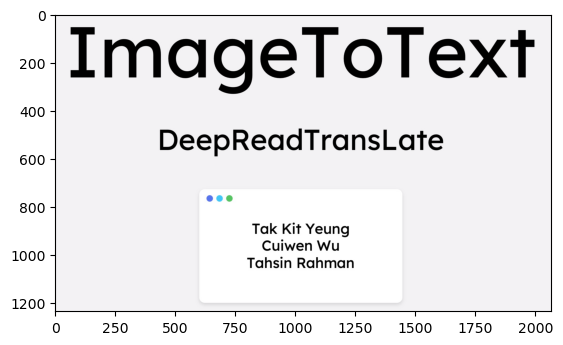

In [11]:
# --------------------------
# Text recognition in images
# --------------------------

# Reading the image
img = cv2.imread('test.jpg')  # OpenCV loads the image in BGR (Blue-Green-Red) format from the given path into a NumPy array
plt.imshow(img)                      

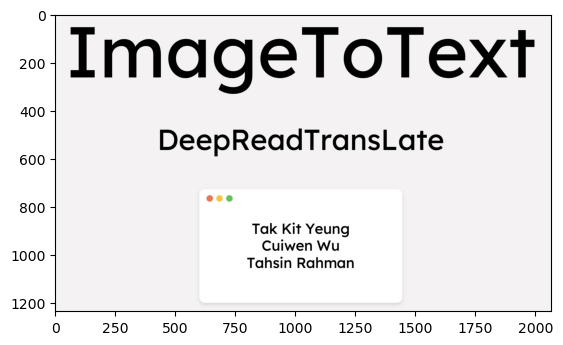

In [13]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB so colors display correctly
plt.imshow(rgb)

In [15]:
text = pytesseract.image_to_string(rgb)  # Extract text with Tesseract OCR
print(text)

ImageloText

DeepReadTransLate

Tak Kit Yeung
Cuiwen Wu
Tahsin Rahman



In [17]:
# ------------------
# Selection of texts
# ------------------

from pytesseract import Output  # Import the Output helper to specify the format of the OCR result
result = pytesseract.image_to_data(rgb, output_type=Output.DICT)  # Perform OCR on the image and return result as a Python dictionary
print(result)

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3], 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, 0, 1, 2, 0, 1, 2], 'left': [0, 65, 65, 65, 65, 437, 437, 437, 437, 801, 801, 822, 822, 949, 1044, 864, 864, 1091, 801, 801, 1011], 'top': [0, 55, 55, 55, 55, 477, 477, 477, 477, 868, 868, 868, 870, 868, 872, 938, 938, 942, 1010, 1010, 1012], 'width': [2066, 1932, 1932, 1932, 1932, 1180, 1180, 1180, 1180, 443, 443, 402, 104, 76, 180, 318, 206, 91, 443, 183, 233], 'height': [1236, 278, 278, 278, 278, 115, 115, 115, 115, 190, 190, 61, 45, 47, 57, 48, 48, 44, 48, 48, 45], 'conf': [-1, -1, -1, -1, 41, -1, -1, -1, 73, -1, -1, -1, 96, 96, 96, -1, 85, 96, -1, 9

In [19]:
# Convert the result dictionary into a table-like format using pandas
import pandas as pd

# Convert to pandas DataFrame
df = pd.DataFrame(result)

# Select only useful columns for display
# columns_to_show = ['level', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text']
columns_to_show = ['level', 'left', 'top', 'width', 'height', 'conf', 'text']
df = df[columns_to_show]
print(df.to_string(index=False))

# Filter: keep only non-empty text and confidence > 40
df_filtered = df[(df['text'].str.strip() != '') & (df['conf'] > 40)]
print(df_filtered.to_string(index=False))

# level = the level corresponds to the category of the detected block (5 possible values: 1-page, 2-block, 3-paragraph, 4-line, 5-word)
# left = x-coordinate where the bounding box starts
# top = y-coordinate where the bounding box starts
# width = width of the current detected text block
# height = height of the current detected text block
# conf = prediction confidence (from 0 to 100. -1 means no text was recognized)
# text = the recognition result

 level  left  top  width  height  conf              text
     1     0    0   2066    1236    -1                  
     2    65   55   1932     278    -1                  
     3    65   55   1932     278    -1                  
     4    65   55   1932     278    -1                  
     5    65   55   1932     278    41       ImageloText
     2   437  477   1180     115    -1                  
     3   437  477   1180     115    -1                  
     4   437  477   1180     115    -1                  
     5   437  477   1180     115    73 DeepReadTransLate
     2   801  868    443     190    -1                  
     3   801  868    443     190    -1                  
     4   822  868    402      61    -1                  
     5   822  870    104      45    96               Tak
     5   949  868     76      47    96               Kit
     5  1044  872    180      57    96             Yeung
     4   864  938    318      48    -1                  
     5   864  938    206      4

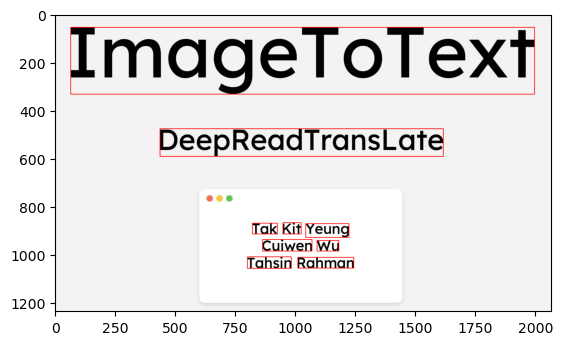

In [21]:
# Define a helper function to draw a bounding box around detected text
def bouding_box(result, img, i, color = (255, 0, 0)):
    # Extract bounding box coordinates and size from result dictionary
    x = result['left'][i]
    y = result['top'][i]
    w = result['width'][i]
    h = result['height'][i]
    # Draw a rectangle on the image
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

# Set minimum confidence threshold
min_confidence = 40
img_copy = rgb.copy()

for i in range(0, len(result['text'])):
    confidence = int(result['conf'][i])
    if confidence > min_confidence:
        # Draw a bounding box for each text element
        bouding_box(result, img_copy, i)

plt.imshow(img_copy)